In [1]:
# pip install pandas plotly kaleido

# %%
import re

import pandas as pd
import plotly.graph_objects as go
from plotly import express as px

In [2]:
s = """
18:32 $ qmk console
Looking for devices...
Ψ Console Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   10 max.d: 3.162 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x41,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=1
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   90 max.d: 3.162 max.vin: 0.600 max.vsc: 0.600 max.a: 1.000012
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   15 max.d: 2.828 max.vin: 0.566 max.vsc: 0.566 max.a: 1.000012
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    5 max.t:   30 max.d: 2.236 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:   10 max.t:   36 max.d: 1.000 max.vin: 0.100 max.vsc: 0.100 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    5 max.t:   91 max.d: 14.318 max.vin: 2.864 max.vsc: 2.864 max.a: 1.001178
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    5 max.t:   45 max.d: 28.302 max.vin: 5.660 max.vsc: 5.660 max.a: 1.249870
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    4 max.t:   85 max.d: 63.253 max.vin: 12.651 max.vsc: 12.651 max.a: 5.051843
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   22 max.d: 149.893 max.vin: 10.394 max.vsc: 10.394 max.a: 4.333273
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   23 max.d: 168.582 max.vin: 16.834 max.vsc: 16.834 max.a: 5.666857
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:    6 max.d: 21.213 max.vin: 4.243 max.vsc: 4.243 max.a: 1.018293
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   11 max.d: 10.296 max.vin: 2.372 max.vsc: 2.372 max.a: 1.000441
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   10 max.d: 33.302 max.vin: 6.512 max.vsc: 6.512 max.a: 1.765917
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:    5 max.d: 99.489 max.vin: 19.898 max.vsc: 19.898 max.a: 5.845103
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:    6 max.d: 107.838 max.vin: 21.568 max.vsc: 21.568 max.a: 5.897966
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:    5 max.d: 69.771 max.vin: 13.954 max.vsc: 13.954 max.a: 5.315533
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:    6 max.d: 102.083 max.vin: 20.417 max.vsc: 20.417 max.a: 5.863949
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:    6 max.d: 103.092 max.vin: 20.618 max.vsc: 20.618 max.a: 5.870642
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   10 max.d: 47.508 max.vin: 10.817 max.vsc: 10.817 max.a: 4.500299
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   10 max.d: 66.843 max.vin: 13.369 max.vsc: 13.369 max.a: 5.207623
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   15 max.d: 9.849 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:    6 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   65 max.d: 160.000 max.vin: 34.308 max.vsc: 34.308 max.a: 5.995779
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   10 max.d: 155.081 max.vin: 31.016 max.vsc: 31.016 max.a: 5.990386
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   20 max.d: 172.679 max.vin: 34.536 max.vsc: 34.536 max.a: 5.996012
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:    6 max.d: 136.488 max.vin: 32.934 max.vsc: 32.934 max.a: 5.994048
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   76 max.d: 145.499 max.vin: 31.754 max.vsc: 31.754 max.a: 5.992006
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:    6 max.d: 133.150 max.vin: 26.630 max.vsc: 26.630 max.a: 5.971220
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   10 max.d: 5.657 max.vin: 1.000 max.vsc: 1.000 max.a: 1.000029
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   10 max.d: 38.210 max.vin: 0.200 max.vsc: 0.200 max.a: 1.000006
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:    6 max.d: 137.535 max.vin: 27.507 max.vsc: 27.507 max.a: 5.976886
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   25 max.d: 162.432 max.vin: 32.486 max.vsc: 32.486 max.a: 5.993343
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   10 max.d: 18.682 max.vin: 3.736 max.vsc: 3.736 max.a: 1.006715
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   10 max.d: 7.616 max.vin: 0.825 max.vsc: 0.825 max.a: 1.000020
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   76 max.d: 153.379 max.vin: 30.676 max.vsc: 30.676 max.a: 5.989532
.Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   86 max.d: 159.806 max.vin: 31.961 max.vsc: 31.961 max.a: 5.992410
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   95 max.d: 34.928 max.vin: 6.986 max.vsc: 6.986 max.a: 2.155224
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   95 max.d: 180.314 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   20 max.d: 3.000 max.vin: 0.400 max.vsc: 0.400 max.a: 1.000008
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    5 max.t:   15 max.d: 4.472 max.vin: 0.894 max.vsc: 0.894 max.a: 1.000022
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    5 max.t:   10 max.d: 39.395 max.vin: 4.005 max.vsc: 4.005 max.a: 1.011444
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   35 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   11 max.d: 20.616 max.vin: 4.123 max.vsc: 4.123 max.a: 1.014453
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    5 max.t:   10 max.d: 16.492 max.vin: 3.046 max.vsc: 3.046 max.a: 1.001697
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   10 max.d: 4.123 max.vin: 0.825 max.vsc: 0.825 max.a: 1.000020
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:  890 max.t:    0 max.d: 1.000 max.vin: 0.001 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   11 max.d: 16.279 max.vin: 1.250 max.vsc: 1.250 max.a: 1.000046
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    5 max.t:   20 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   10 max.d: 77.466 max.vin: 15.493 max.vsc: 15.493 max.a: 5.534139
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    5 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:    5 max.t:   10 max.d: 11.180 max.vin: 2.236 max.vsc: 2.236 max.a: 1.000336
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:    4 max.t:   20 max.d: 25.495 max.vin: 5.831 max.vsc: 5.831 max.a: 1.325380
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:  590 max.t:    0 max.d: 9.899 max.vin: 0.017 max.vsc: 0.017 max.a: 1.000004
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:    4 max.t:   10 max.d: 180.314 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:    4 max.t:   11 max.d: 180.314 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1400 min.t:    4 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    5 max.t:   20 max.d: 158.600 max.vin: 31.016 max.vsc: 31.016 max.a: 5.990386
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    5 max.t:   16 max.d: 17.464 max.vin: 2.530 max.vsc: 2.530 max.a: 1.000605
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    4 max.t:   20 max.d: 181.019 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    4 max.t:   51 max.d: 181.019 max.vin: 36.204 max.vsc: 36.204 max.a: 5.997372
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   66 max.d: 131.735 max.vin: 26.347 max.vsc: 26.347 max.a: 5.969109
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 min.t:    5 max.t:   15 max.d: 1.414 max.vin: 0.200 max.vsc: 0.200 max.a: 1.000006
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 min.t:    4 max.t:   91 max.d: 180.314 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 min.t:    5 max.t:   10 max.d: 102.883 max.vin: 20.577 max.vsc: 20.577 max.a: 5.869285
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:  651 max.t:    0 max.d: 2.236 max.vin: 0.003 max.vsc: 0.003 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:    4 max.t:   25 max.d: 18.439 max.vin: 4.070 max.vsc: 4.070 max.a: 1.013006
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t: 2020 max.t:    0 max.d: 1.000 max.vin: 0.000 max.vsc: 0.000 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    5 max.t:   15 max.d: 92.455 max.vin: 5.000 max.vsc: 5.000 max.a: 1.078704
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    4 max.t:   45 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    5 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    5 max.t:   10 max.d: 50.000 max.vin: 9.235 max.vsc: 9.235 max.a: 3.773201
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:    9 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t: 1541 max.t:    0 max.d: 1.000 max.vin: 0.001 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 32.388 max.vin: 5.551 max.vsc: 5.551 max.a: 1.209051
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   15 max.d: 20.248 max.vin: 4.050 max.vsc: 4.050 max.a: 1.012502
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 180.314 max.vin: 45.078 max.vsc: 45.078 max.a: 5.999714
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 57.245 max.vin: 11.449 max.vsc: 11.449 max.a: 4.719589
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 131.469 max.vin: 23.221 max.vsc: 23.221 max.a: 5.932507
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 96.773 max.vin: 19.355 max.vsc: 19.355 max.a: 5.822575
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 87.207 max.vin: 17.692 max.vsc: 17.692 max.a: 5.731126
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 180.314 max.vin: 36.063 max.vsc: 36.063 max.a: 5.997278
"""

In [3]:
cols = "DPI T_min T_max D V_input V_scaled A_factor".split()


def parse_console(s):
    regex = r"MACCEL: DPI: +(\d+) +min.t: +(\d+) +max.t: +(\d+) +max.d: +(\d+\.\d+) +max.vin: +(\d+\.\d+) +max.vsc: +(\d+\.\d+) +max.a: +(\d+\.\d+)"
    df = pd.DataFrame(
        [
            [
                f(d)
                for f, d in zip([int, int, int, float, float, float, float], m.groups())
            ]
            for m in re.finditer(regex, s)
        ],
        columns=cols,
    )
    return df.groupby("DPI").max()


df = parse_console(s)
df

,T_min,T_max,D,V_input,V_scaled,A_factor
DPI,,,,,,
200,10,91,63.253,12.651,12.651,5.051843
400,5,90,168.582,21.568,21.568,5.897966
600,5,15,180.314,36.063,36.063,5.997278
800,5,95,180.314,45.078,45.078,5.999714
1000,5,35,180.314,36.063,36.063,5.997278
1200,890,20,180.314,36.063,36.063,5.997278
1400,590,20,180.314,45.078,45.078,5.999714
2000,5,51,181.019,45.078,45.078,5.999714
2200,4,66,131.735,26.347,26.347,5.969109


In [4]:
def plot(df):
    from plotly.subplots import make_subplots

    fig = make_subplots(
        specs=[[{"secondary_y": True}]],
        subplot_titles="max values",
        x_title=cols[0],
        y_title="V, A",
    )

    fig.add_trace(
        go.Scattergl(
            x=df.index,
            y=df.iloc[:, 2],
            name=cols[3],
        ),
        secondary_y=True,
    )
    fig.add_trace(
        go.Scattergl(x=df.index, y=df.iloc[:, 3], name=cols[4]), secondary_y=False
    )
    # fig.add_trace(
    #     go.Scattergl(x=df.index, y=df.iloc[:, 4], name=cols[5]), secondary_y=False
    # )
    # fig.add_trace(
    #     go.Scattergl(x=df.index, y=df.iloc[:, 5], name=cols[6]), secondary_y=False
    # )
    fig.update_yaxes(title_text="D", secondary_y=True)

    return fig


fig = plot(df)
fig

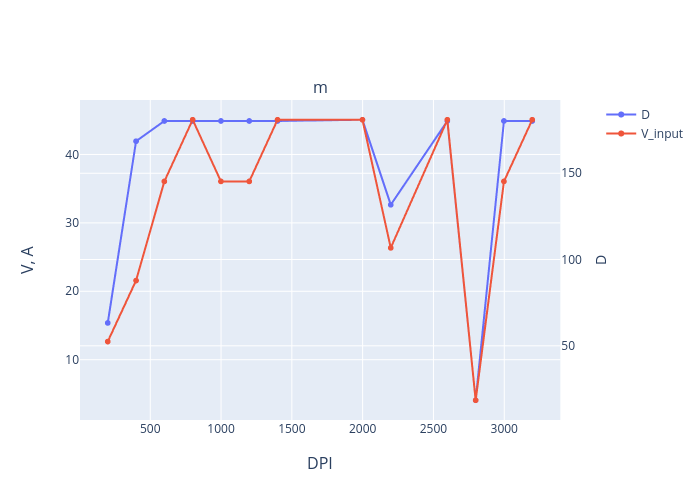

In [5]:
# Generate static diagrag for GitHub: https://plotly.com/python/static-image-export/
fig.show("png")

# Obviously PWV3360 clips at distnance=180

In [6]:
# SLOW velodity
s = """
Looking for devices...
Ψ Console Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   10 max.d: 3.162 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    5 max.t:   10 max.d: 2.000 max.vin: 0.400 max.vsc: 0.400 max.a: 1.000008
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    4 max.t:   91 max.d: 2.236 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
^[[5~Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   10 max.d: 2.236 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   23 max.d: 6.000 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    4 max.t:   35 max.d: 2.236 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    4 max.t:   11 max.d: 4.243 max.vin: 0.849 max.vsc: 0.849 max.a: 1.000021
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   45 max.d: 5.000 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   20 max.d: 5.000 max.vin: 1.000 max.vsc: 1.000 max.a: 1.000029
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   23 max.d: 13.601 max.vin: 0.825 max.vsc: 0.825 max.a: 1.000020
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   15 max.d: 4.123 max.vin: 0.825 max.vsc: 0.825 max.a: 1.000020
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   10 max.d: 4.123 max.vin: 0.901 max.vsc: 0.901 max.a: 1.000023
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   21 max.d: 3.162 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   23 max.d: 14.036 max.vin: 1.344 max.vsc: 1.344 max.a: 1.000057
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   20 max.d: 3.162 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t: 1479 max.t:    0 max.d: 1.000 max.vin: 0.001 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   60 max.d: 5.831 max.vin: 1.166 max.vsc: 1.166 max.a: 1.000039
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   15 max.d: 6.708 max.vin: 1.342 max.vsc: 1.342 max.a: 1.000056
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   46 max.d: 6.083 max.vin: 1.217 max.vsc: 1.217 max.a: 1.000043
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    5 max.t:   90 max.d: 2.236 max.vin: 0.447 max.vsc: 0.447 max.a: 1.000010
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    4 max.t:   55 max.d: 12.083 max.vin: 2.417 max.vsc: 2.417 max.a: 1.000482
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2000 min.t:    4 max.t:   10 max.d: 11.045 max.vin: 2.209 max.vsc: 2.209 max.a: 1.000318
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    4 max.t:   24 max.d: 27.295 max.vin: 2.088 max.vsc: 2.088 max.a: 1.000250
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    5 max.t:   65 max.d: 3.000 max.vin: 0.600 max.vsc: 0.600 max.a: 1.000012
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    4 max.t:   23 max.d: 28.844 max.vin: 1.562 max.vsc: 1.562 max.a: 1.000087
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    5 max.t:   10 max.d: 11.000 max.vin: 2.154 max.vsc: 2.154 max.a: 1.000286
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    4 max.t:   20 max.d: 10.440 max.vin: 2.088 max.vsc: 2.088 max.a: 1.000250
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2400 min.t:    4 max.t:   10 max.d: 12.000 max.vin: 2.400 max.vsc: 2.400 max.a: 1.000467
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2600 min.t:    4 max.t:   35 max.d: 10.817 max.vin: 2.163 max.vsc: 2.163 max.a: 1.000291
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t: 5281 max.t:    0 max.d: 1.000 max.vin: 0.000 max.vsc: 0.000 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    4 max.t:   10 max.d: 16.125 max.vin: 3.206 max.vsc: 3.206 max.a: 1.002336
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    4 max.t:   11 max.d: 15.297 max.vin: 2.912 max.vsc: 2.912 max.a: 1.001298
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    5 max.t:   23 max.d: 47.539 max.vin: 2.912 max.vsc: 2.912 max.a: 1.001298
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3000 min.t:    5 max.t:   10 max.d: 11.662 max.vin: 2.332 max.vsc: 2.332 max.a: 1.000408
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 16.000 max.vin: 3.200 max.vsc: 3.200 max.a: 1.002306
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t: 6299 max.t:    0 max.d: 1.000 max.vin: 0.000 max.vsc: 0.000 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t: 1167 max.t:    0 max.d: 1.000 max.vin: 0.001 max.vsc: 0.001 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   85 max.d: 16.000 max.vin: 3.162 max.vsc: 3.162 max.a: 1.002139
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   23 max.d: 34.928 max.vin: 2.720 max.vsc: 2.720 max.a: 1.000885
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
"""

In [7]:
df = parse_console(s)
fig = plot(df)
display(df, fig)

,T_min,T_max,D,V_input,V_scaled,A_factor
DPI,,,,,,
200,5,91,2.236,0.447,0.447,1.000010
400,5,23,6.000,0.447,0.447,1.000010
600,5,35,4.243,0.849,0.849,1.000021
800,4,45,13.601,1.000,1.000,1.000029
1000,4,23,14.036,1.344,1.344,1.000057
1200,1479,60,6.708,1.342,1.342,1.000056
2000,5,90,12.083,2.417,2.417,1.000482
2400,5,65,28.844,2.400,2.400,1.000467
2600,4,35,10.817,2.163,2.163,1.000291


In [8]:
# Moving slow the mouse

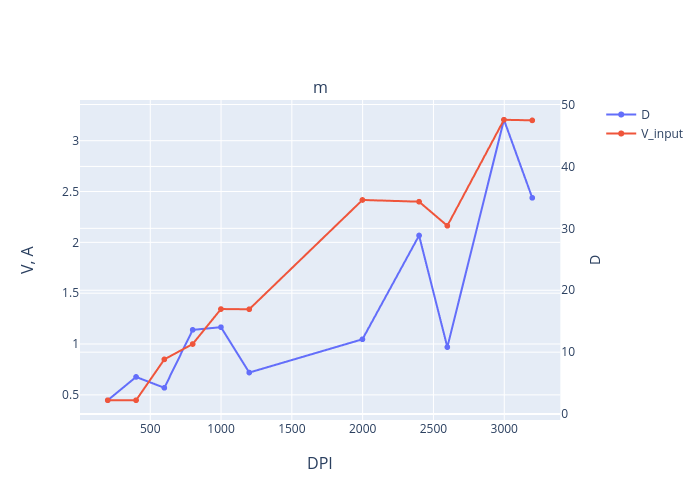

In [9]:
fig.show("png")

# Pretty linear except at low DPIs

In [10]:
## Moving trachball a bit faster.
s = """
19:28 $ qmk console
Looking for devices...
Ψ Console Connected: Bastard Keyboards Charybdis (4x6) Splinky (A8F8:1833:1)
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    5 max.t:   11 max.d: 5.385 max.vin: 1.077 max.vsc: 1.077 max.a: 1.000033
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:   10 max.t:   25 max.d: 1.000 max.vin: 0.100 max.vsc: 0.100 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    5 max.t:   30 max.d: 12.083 max.vin: 0.894 max.vsc: 0.894 max.a: 1.000022
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    4 max.t:   10 max.d: 4.123 max.vin: 0.825 max.vsc: 0.825 max.a: 1.000020
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    4 max.t:   22 max.d: 14.560 max.vin: 1.118 max.vsc: 1.118 max.a: 1.000036
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  200 min.t:    4 max.t:   10 max.d: 4.472 max.vin: 0.894 max.vsc: 0.894 max.a: 1.000022
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:   10 max.t:   10 max.d: 3.000 max.vin: 0.100 max.vsc: 0.100 max.a: 1.000005
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   10 max.d: 10.440 max.vin: 2.088 max.vsc: 2.088 max.a: 1.000250
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   10 max.d: 9.849 max.vin: 2.136 max.vsc: 2.136 max.a: 1.000275
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  400 min.t:    4 max.t:   11 max.d: 8.544 max.vin: 1.649 max.vsc: 1.649 max.a: 1.000103
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x2,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x2 (600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   10 max.d: 4.472 max.vin: 0.632 max.vsc: 0.632 max.a: 1.000014
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   20 max.d: 9.849 max.vin: 1.970 max.vsc: 1.970 max.a: 1.000197
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    5 max.t:   10 max.d: 7.000 max.vin: 1.400 max.vsc: 1.400 max.a: 1.000063
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    4 max.t:   10 max.d: 9.055 max.vin: 1.800 max.vsc: 1.800 max.a: 1.000141
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  600 min.t:    4 max.t:   10 max.d: 9.849 max.vin: 1.970 max.vsc: 1.970 max.a: 1.000197
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   10 max.d: 8.246 max.vin: 1.649 max.vsc: 1.649 max.a: 1.000103
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x3,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x3 (800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t: 2070 max.t:    0 max.d: 1.000 max.vin: 0.000 max.vsc: 0.000 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    5 max.t:   15 max.d: 18.868 max.vin: 3.774 max.vsc: 3.774 max.a: 1.007232
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:   10 max.d: 14.318 max.vin: 2.864 max.vsc: 2.864 max.a: 1.001178
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI:  800 min.t:    4 max.t:    6 max.d: 16.763 max.vin: 3.353 max.vsc: 3.353 max.a: 1.003127
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x4,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x4 (1000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   24 max.d: 66.287 max.vin: 4.205 max.vsc: 4.205 max.a: 1.016978
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   10 max.d: 5.099 max.vin: 1.020 max.vsc: 1.020 max.a: 1.000029
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   10 max.d: 25.710 max.vin: 5.048 max.vsc: 5.048 max.a: 1.086007
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1000 min.t:    4 max.t:   10 max.d: 22.204 max.vin: 4.441 max.vsc: 4.441 max.a: 1.026971
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x5,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x5 (1200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   10 max.d: 28.844 max.vin: 5.769 max.vsc: 5.769 max.a: 1.296179
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   30 max.d: 80.056 max.vin: 4.569 max.vsc: 4.569 max.a: 1.034648
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   26 max.d: 94.021 max.vin: 4.808 max.vsc: 4.808 max.a: 1.054842
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   10 max.d: 26.000 max.vin: 5.200 max.vsc: 5.200 max.a: 1.113627
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1200 min.t:    4 max.t:   10 max.d: 27.785 max.vin: 5.557 max.vsc: 5.557 max.a: 1.211166
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x6,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x6 (1400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x7,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x7 (1600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 min.t:    4 max.t:   10 max.d: 14.213 max.vin: 2.369 max.vsc: 2.369 max.a: 1.000438
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 min.t:    4 max.t:   10 max.d: 29.428 max.vin: 6.505 max.vsc: 6.505 max.a: 1.760689
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 min.t:    4 max.t:   40 max.d: 29.547 max.vin: 5.909 max.vsc: 5.909 max.a: 1.365089
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 1600 min.t:    4 max.t:   10 max.d: 28.636 max.vin: 5.126 max.vsc: 5.126 max.a: 1.099399
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x8,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x8 (1800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x9,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x9 (2000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xA,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xA (2200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   10 max.d: 37.656 max.vin: 7.531 max.vsc: 7.531 max.a: 2.609737
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    5 max.t:   15 max.d: 24.739 max.vin: 4.948 max.vsc: 4.948 max.a: 1.071376
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   10 max.d: 42.107 max.vin: 7.694 max.vsc: 7.694 max.a: 2.739931
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   10 max.d: 48.847 max.vin: 9.769 max.vsc: 9.769 max.a: 4.051546
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   10 max.d: 55.036 max.vin: 11.007 max.vsc: 11.007 max.a: 4.570085
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2200 min.t:    4 max.t:   15 max.d: 38.588 max.vin: 7.718 max.vsc: 7.718 max.a: 2.758309
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xB,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xB (2400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xC,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xC (2600)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xD,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xD (2800)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:  136 max.t:    0 max.d: 2.000 max.vin: 0.007 max.vsc: 0.007 max.a: 1.000003
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:    4 max.t:   10 max.d: 47.927 max.vin: 9.176 max.vsc: 9.176 max.a: 3.740358
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:    4 max.t:   41 max.d: 55.027 max.vin: 10.435 max.vsc: 10.435 max.a: 4.349991
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 2800 min.t:    4 max.t:   10 max.d: 58.523 max.vin: 11.574 max.vsc: 11.574 max.a: 4.759011
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xE,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xE (3000)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0xF,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0xF (3200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    5 max.t:   10 max.d: 41.231 max.vin: 8.246 max.vsc: 8.246 max.a: 3.152351
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 66.098 max.vin: 12.720 max.vsc: 12.720 max.a: 5.068145
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 58.822 max.vin: 11.764 max.vsc: 11.764 max.a: 4.816651
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   11 max.d: 72.719 max.vin: 14.043 max.vsc: 14.043 max.a: 5.330524
Bastard Keyboards:Charybdis (4x6) Splinky:1: MACCEL: DPI: 3200 min.t:    4 max.t:   10 max.d: 71.281 max.vin: 13.525 max.vsc: 13.525 max.a: 5.237963
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x0,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x0 (200)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
Bastard Keyboards:Charybdis (4x6) Splinky:1: (charybdis) process_record_kb: config = {
Bastard Keyboards:Charybdis (4x6) Splinky:1:    raw = 0x1,
Bastard Keyboards:Charybdis (4x6) Splinky:1:    {
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_dragscroll_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            is_sniping_enabled=0
Bastard Keyboards:Charybdis (4x6) Splinky:1:            default_dpi=0x1 (400)
Bastard Keyboards:Charybdis (4x6) Splinky:1:            sniping_dpi=0x0 (100)
Bastard Keyboards:Charybdis (4x6) Splinky:1:    }
Bastard Keyboards:Charybdis (4x6) Splinky:1: }
"""

In [11]:
df = parse_console(s)
fig = plot(df)
display(df, fig)

,T_min,T_max,D,V_input,V_scaled,A_factor
DPI,,,,,,
200,10,30,14.560,1.118,1.118,1.000036
400,10,11,10.440,2.136,2.136,1.000275
600,5,20,9.849,1.970,1.970,1.000197
800,2070,15,18.868,3.774,3.774,1.007232
1000,4,24,66.287,5.048,5.048,1.086007
1200,4,30,94.021,5.769,5.769,1.296179
1600,4,40,29.547,6.505,6.505,1.760689
2200,5,15,55.036,11.007,11.007,4.570085
2800,136,41,58.523,11.574,11.574,4.759011


In [12]:
# Moving trachball a bit faster.

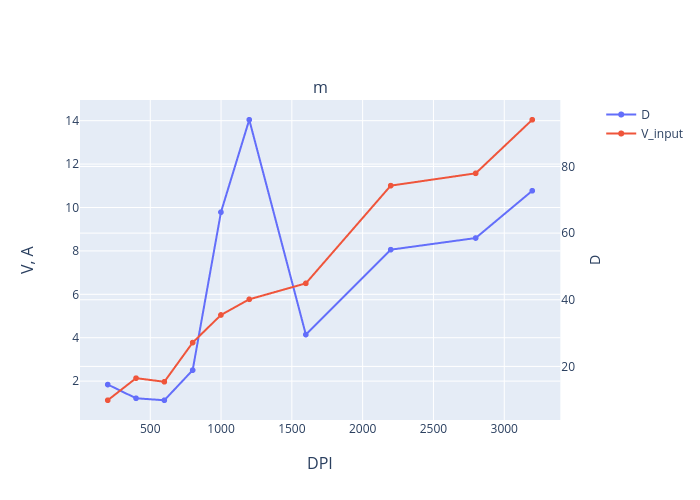

In [13]:
fig.show("png")

# Note the reports with bigger distances than usual that did not affect velocity
# (66.287 @ 1000, 94.021 @ 1200)